In [32]:
import pandas as pd
import numpy as np

# load training data
X = pd.read_csv('X_train.csv')
Y = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

# show availible features
X.columns

Index(['PLAYER_AGE_st', 'GP_st', 'GS_st', 'MIN_st', 'FGM_st', 'FGA_st',
       'FG_PCT_st', 'FG3M_st', 'FG3A_st', 'FG3_PCT_st', 'FTM_st', 'FTA_st',
       'FT_PCT_st', 'OREB_st', 'DREB_st', 'REB_st', 'AST_st', 'STL_st',
       'BLK_st', 'TOV_st', 'PF_st', 'PTS_AVG_st', 'PLAYER_AGE_nd', 'GP_nd',
       'GS_nd', 'MIN_nd', 'FGM_nd', 'FGA_nd', 'FG_PCT_nd', 'FG3M_nd',
       'FG3A_nd', 'FG3_PCT_nd', 'FTM_nd', 'FTA_nd', 'FT_PCT_nd', 'OREB_nd',
       'DREB_nd', 'REB_nd', 'AST_nd', 'STL_nd', 'BLK_nd', 'TOV_nd', 'PF_nd',
       'PTS_AVG_nd', 'PLAYER_AGE_rd', 'GP_rd', 'GS_rd', 'MIN_rd', 'FGM_rd',
       'FGA_rd', 'FG_PCT_rd', 'FG3M_rd', 'FG3A_rd', 'FG3_PCT_rd', 'FTM_rd',
       'FTA_rd', 'FT_PCT_rd', 'OREB_rd', 'DREB_rd', 'REB_rd', 'AST_rd',
       'STL_rd', 'BLK_rd', 'TOV_rd', 'PF_rd', 'PTS_AVG_rd', 'PLAYER_AGE'],
      dtype='object')

In [33]:
# preprocessing features
X['TOV_AVG_st'] = X['TOV_st'] / X['GP_st']
X['TOV_AVG_nd'] = X['TOV_nd'] / X['GP_nd']
X['TOV_AVG_rd'] = X['TOV_rd'] / X['GP_rd']

X_test['TOV_AVG_st'] = X_test['TOV_st'] / X_test['GP_st']
X_test['TOV_AVG_nd'] = X_test['TOV_nd'] / X_test['GP_nd']
X_test['TOV_AVG_rd'] = X_test['TOV_rd'] / X_test['GP_rd']

In [34]:
# select features
selected_features = ['PTS_AVG_st','PTS_AVG_nd','PTS_AVG_rd','TOV_AVG_st', 'TOV_AVG_nd', 'TOV_AVG_rd','PLAYER_AGE', 'OREB_st', 'OREB_nd', 'OREB_rd', 'STL_st', 'STL_nd', 'STL_rd', 'FT_PCT_st', 'FT_PCT_nd', 'FT_PCT_rd']

X = X[selected_features].values.copy()
Y = Y.values.copy()
X_test = X_test[selected_features].values.copy()

# data normalization
for i in range(X.shape[1]):
    X[:,i] -= np.mean(X[:,i])
    X[:,i] /= np.std(X[:,i])
    X_test[:,i] -= np.mean(X_test[:,i])
    X_test[:,i] /= np.std(X_test[:,i])

# split data into training set and validation set
X_val = X[8001:]
Y_val = Y[8001:]
X_train = X[:8001]
Y_train = Y[:8001]

In [35]:
# build a linear model 
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# linear model
model.add(Dense(1, input_dim = len(selected_features), activation = 'linear'))

# overfitting model
# model.add(Dense(400, input_dim = len(selected_features), activation = 'relu'))
# model.add(Dense(200, activation = 'relu'))
# model.add(Dense(100, activation = 'relu'))
# model.add(Dense(1, activation = 'relu'))

# overfitting model + regularizer
# reg = keras.regularizers.l2(0.05)
# model.add(Dense(400, input_dim = len(selected_features), activation = 'relu', kernel_regularizer = reg))
# model.add(Dense(200, activation = 'relu', kernel_regularizer = reg))
# model.add(Dense(100, activation = 'relu', kernel_regularizer = reg))
# model.add(Dense(1, activation = 'relu', kernel_regularizer = reg))

model.compile(optimizer='adam',loss='mse')

# training
history = model.fit(X_train, Y_train, epochs=300, batch_size=64, validation_data = (X_val, Y_val))

Train on 8001 samples, validate on 1999 samples
Epoch 1/300
8001/8001 [==============================] - 1s 81us/step - loss: 51.9072 - val_loss: 31.1463
Epoch 2/300
8001/8001 [==============================] - 0s 35us/step - loss: 29.8775 - val_loss: 28.9385
Epoch 3/300
8001/8001 [==============================] - 0s 37us/step - loss: 26.8450 - val_loss: 26.5002
Epoch 4/300
8001/8001 [==============================] - 0s 47us/step - loss: 23.7373 - val_loss: 22.6000
Epoch 5/300
8001/8001 [==============================] - 0s 42us/step - loss: 19.8077 - val_loss: 20.9807
Epoch 6/300
8001/8001 [==============================] - 0s 37us/step - loss: 16.7985 - val_loss: 15.2392
Epoch 7/300
8001/8001 [==============================] - 0s 37us/step - loss: 14.2186 - val_loss: 13.2983
Epoch 8/300
8001/8001 [==============================] - 0s 37us/step - loss: 12.9213 - val_loss: 12.0015
Epoch 9/300
8001/8001 [==============================] - 0s 36us/step - loss: 12.1792 - val_loss: 11.631

8001/8001 [==============================] - 0s 35us/step - loss: 9.6425 - val_loss: 9.2868
Epoch 79/300
8001/8001 [==============================] - 0s 32us/step - loss: 9.8174 - val_loss: 8.7937
Epoch 80/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.6971 - val_loss: 8.7738
Epoch 81/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.9376 - val_loss: 8.7848
Epoch 82/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.6362 - val_loss: 8.9339
Epoch 83/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.6657 - val_loss: 8.7594
Epoch 84/300
8001/8001 [==============================] - 0s 32us/step - loss: 9.6559 - val_loss: 8.9669
Epoch 85/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.7409 - val_loss: 8.8044
Epoch 86/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.6190 - val_loss: 8.7728
Epoch 87/300
8001/8001 [==============================] - 0s 31us/st

8001/8001 [==============================] - 0s 36us/step - loss: 9.6083 - val_loss: 9.0788
Epoch 156/300
8001/8001 [==============================] - 0s 36us/step - loss: 9.6529 - val_loss: 8.8341
Epoch 157/300
8001/8001 [==============================] - 0s 36us/step - loss: 9.5923 - val_loss: 8.7983
Epoch 158/300
8001/8001 [==============================] - 0s 35us/step - loss: 9.6234 - val_loss: 8.7958
Epoch 159/300
8001/8001 [==============================] - 0s 34us/step - loss: 9.6663 - val_loss: 9.0816
Epoch 160/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.7216 - val_loss: 8.8345
Epoch 161/300
8001/8001 [==============================] - 0s 34us/step - loss: 9.6445 - val_loss: 9.0488
Epoch 162/300
8001/8001 [==============================] - 0s 35us/step - loss: 10.0193 - val_loss: 8.9372
Epoch 163/300
8001/8001 [==============================] - 0s 31us/step - loss: 9.6864 - val_loss: 8.8684
Epoch 164/300
8001/8001 [==============================] - 

8001/8001 [==============================] - 0s 48us/step - loss: 9.8313 - val_loss: 9.0109
Epoch 233/300
8001/8001 [==============================] - 0s 45us/step - loss: 9.6155 - val_loss: 8.8786
Epoch 234/300
8001/8001 [==============================] - 0s 48us/step - loss: 9.6650 - val_loss: 8.8444
Epoch 235/300
8001/8001 [==============================] - 0s 45us/step - loss: 9.6519 - val_loss: 8.8099
Epoch 236/300
8001/8001 [==============================] - 0s 37us/step - loss: 9.6032 - val_loss: 8.8970
Epoch 237/300
8001/8001 [==============================] - 0s 37us/step - loss: 9.6559 - val_loss: 8.8636
Epoch 238/300
8001/8001 [==============================] - 0s 41us/step - loss: 9.6704 - val_loss: 9.0648
Epoch 239/300
8001/8001 [==============================] - 0s 36us/step - loss: 9.6138 - val_loss: 8.7994
Epoch 240/300
8001/8001 [==============================] - 0s 35us/step - loss: 9.6081 - val_loss: 8.8266
Epoch 241/300
8001/8001 [==============================] - 0

In [36]:
# predict
predicted = model.predict(X_test).reshape(1819)
out_file = 'out_overfit.csv'
with open(out_file,'w') as f:
    f.write('id,value\n')
    for i in range(len(predicted)):
        f.write(str(i)+','+str(predicted[i])+'\n')

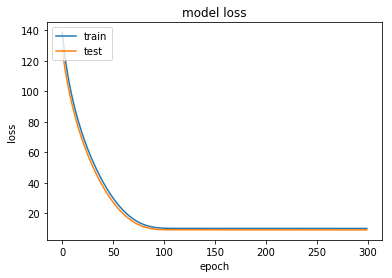

In [30]:
# training process

from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('history_regularization')
plt.show()

In [21]:
# last year/this year scatter

from matplotlib import pyplot as plt
plt.scatter(X['PTS_AVG_rd'].values, Y['PTS_AVG'].values, s=3)
plt.title('last year -> this year')
plt.ylabel('PTS_AVG')
plt.xlabel('PTS_AVG_rd')
plt.savefig('wx+b')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [10]:
X

array([[-1.24473389, -0.81385415, -0.49773939, ..., -0.37910083,
         0.0279804 , -0.90181297],
       [-0.78100258, -0.555947  , -0.93724181, ..., -0.00293679,
         0.04311354, -0.64557971],
       [-0.58864038, -0.60271656,  0.0067165 , ..., -1.34038734,
        -1.33508245, -0.90181297],
       ...,
       [ 1.05028554,  1.31024221,  0.87784262, ...,  1.50661029,
         1.11455684,  0.89181988],
       [ 1.32272573,  0.82921392,  0.93300542, ...,  1.06322258,
         0.69563101,  1.14805314],
       [-1.1879731 , -1.41025323, -1.19932728, ..., -1.11058484,
        -0.39210625, -1.15804624]])

In [12]:
X['PTS_AVG_rd']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices